In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn import preprocessing

In [20]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [21]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [23]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [24]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [25]:
data.Residence_type.value_counts() 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [26]:
data.gender.value_counts()  

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [27]:
data[data.gender == 'Other']  

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [28]:
data.smoking_status.value_counts()  

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [29]:
data= data.drop(labels = [3116], axis = 0)

In [30]:
data = data.drop(['id'], axis = 1)

In [31]:
median_bmi = data.bmi.median()
data.bmi.fillna (median_bmi, inplace = True)

# Visualisation

In [32]:
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='stroke', ylabel='count'>

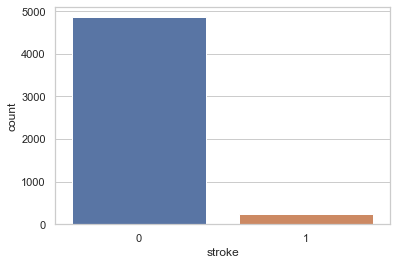

In [33]:
sns.countplot(x=data["stroke"])

<AxesSubplot:xlabel='gender', ylabel='count'>

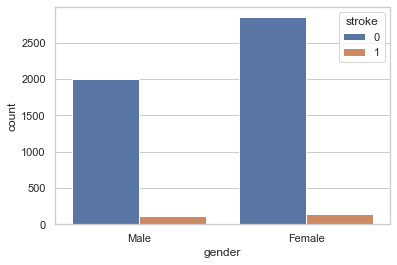

In [16]:
sns.countplot(x = 'gender', hue = 'stroke', data = data)

In [17]:
data['age'] = pd.cut(data.age, [0,10,20,30,40,50,60,70,80,90])

<AxesSubplot:xlabel='age', ylabel='count'>

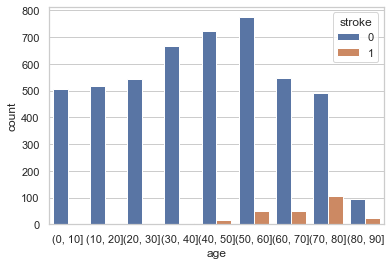

In [18]:
sns.countplot(x = 'age', hue = 'stroke', data = data)

<AxesSubplot:xlabel='age', ylabel='gender'>

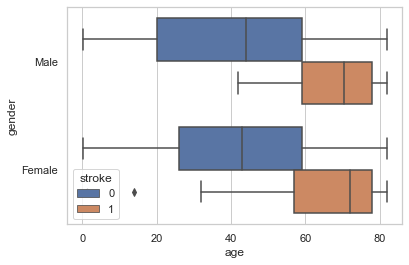

In [34]:
sns.boxplot(data=data, x="age", y="gender", hue="stroke")


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

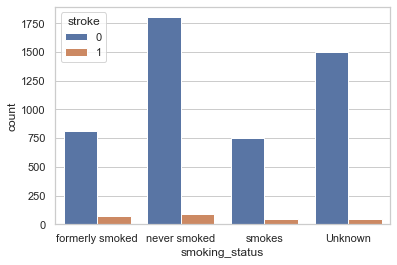

In [35]:
sns.countplot(x = 'smoking_status', hue = 'stroke', data = data)

<AxesSubplot:xlabel='age', ylabel='smoking_status'>

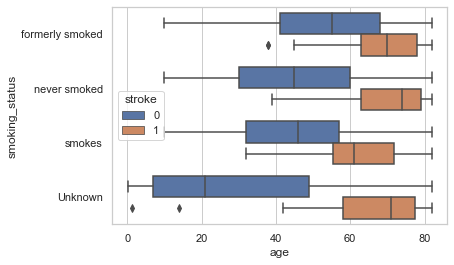

In [36]:
sns.boxplot(data=data, x="age", y="smoking_status", hue="stroke")


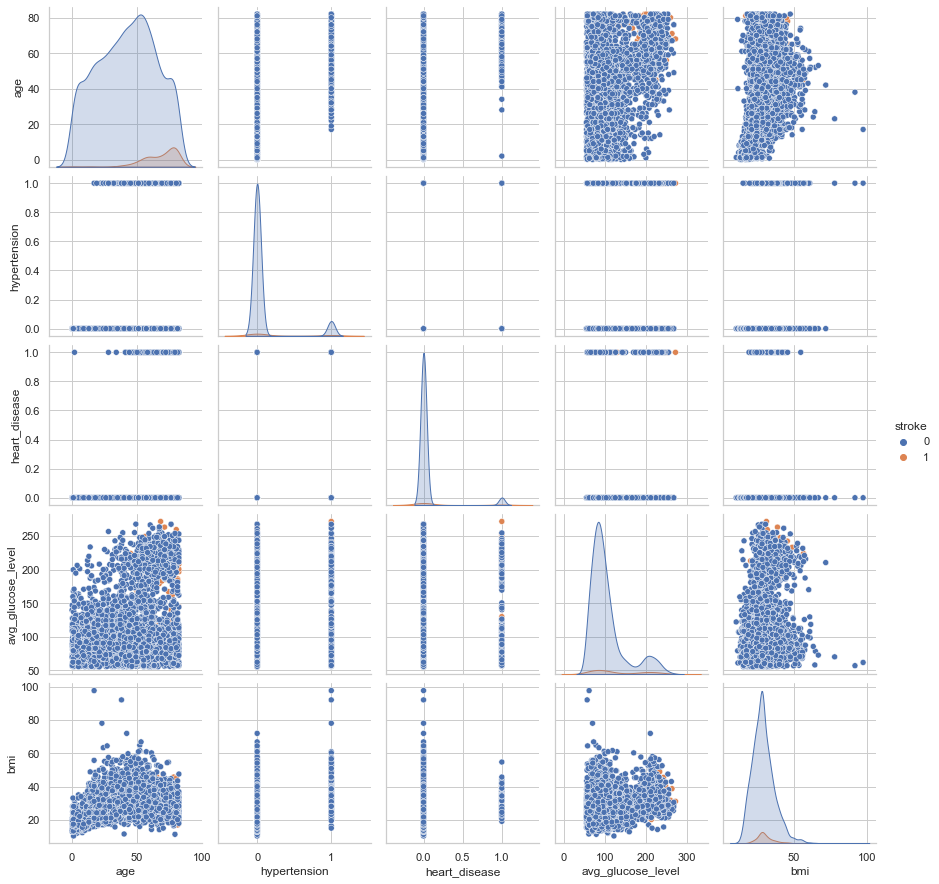

In [37]:
sns.pairplot(data=data,hue='stroke')

# Preparing data

In [38]:
data['gender'] = data['gender'].map({'Female':0,'Male':1})
data['ever_married'] = data['ever_married'].map({'No':0,'Yes':1})
data['Residence_type'] = data['Residence_type'].map({'Rural':0,'Urban':1})


In [39]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,28.1,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [40]:
def encode (column_name, df):
    ohe = OneHotEncoder()
    transformed = ohe.fit_transform(df[[column_name]])
    df[ohe.categories_[0]] = transformed.toarray()



In [41]:
encode('work_type', data)

In [42]:
encode('smoking_status', data)

In [43]:
data = data.drop(['work_type', 'smoking_status'], axis = 1)

<AxesSubplot:>

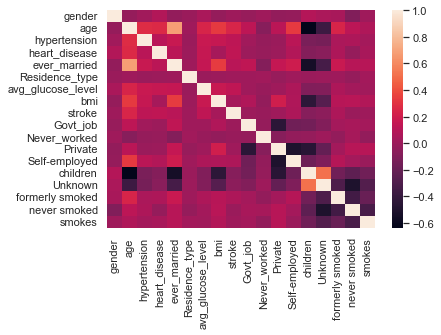

In [44]:
sns.heatmap(data.corr())

Split data

In [45]:
X = data.drop(['stroke'], axis = 1)
Y = data.stroke

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [47]:
y_train

1547    0
4976    0
246     1
2824    0
3799    0
       ..
4932    0
3265    0
1653    0
2607    0
2732    0
Name: stroke, Length: 4087, dtype: int64

In [48]:
X_test

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
42,1,82.0,0,1,1,1,144.90,26.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
380,1,4.0,0,0,0,0,106.22,16.7,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1559,0,53.0,0,0,1,0,72.63,66.8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
352,0,20.0,0,0,0,0,96.57,34.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3639,0,51.0,1,0,1,0,85.84,31.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,0,20.0,0,0,0,1,98.55,21.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
660,1,52.0,0,0,0,0,69.37,36.2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
57,1,78.0,0,0,1,1,237.75,28.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4267,1,36.0,0,0,1,0,119.90,37.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model creation

 RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
tree_clf = RandomForestClassifier(n_estimators = 50, criterion= 'entropy',  random_state = 0)

In [51]:
tree_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [52]:
cross_val_score (tree_clf, X_train, y_train, cv = 5)

array([0.95232274, 0.95354523, 0.95104039, 0.94859241, 0.94859241])

In [53]:
y_pred_test_tree_clf = tree_clf.predict(X_test)
acc_train_tree_clf = accuracy_score(y_test, y_pred_test_tree_clf)
acc_train_tree_clf

0.9461839530332681

In [54]:
y_pred_prob_tree_clf = tree_clf.predict_proba(X_test)[:, 1]
tree_clf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_tree_clf)
tree_clf_roc_auc_score

0.7619088613406796

DecisionTreeClassifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [56]:
bag_clf = BaggingClassifier( 
    DecisionTreeClassifier(random_state=0, max_depth=1), n_estimators=70, 
    max_samples=0.02, bootstrap=True, oob_score = True, n_jobs=-1, random_state=0) 
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        random_state=0),
                  max_samples=0.02, n_estimators=70, n_jobs=-1, oob_score=True,
                  random_state=0)

In [57]:
cross_val_score (bag_clf, X_train, y_train, cv = 5)

array([0.95232274, 0.95232274, 0.95226438, 0.95226438, 0.95226438])

In [58]:
y_pred_test_bag_clf = bag_clf.predict(X_test)
acc_train_bag_clf = accuracy_score(y_test, y_pred_test_bag_clf)
acc_train_bag_clf

0.9471624266144814

XGBoost

In [59]:
from sklearn.preprocessing import MinMaxScaler 
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)


In [60]:
from xgboost import XGBClassifier

In [61]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1, random_state=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
y_pred_train_xgb = xgb.predict(X_train)
acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
acc_train_xgb

0.9659897235135796

GridSearchCV + SVC

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [64]:
sc = StandardScaler() 
X_train = sc.fit_transform (X_train)
X_test = sc.fit_transform (X_test)

In [65]:
svm_clf = SVC()

In [66]:
grid = GridSearchCV(svm_clf, 
                    param_grid={'C': [0.001,0.5,1,5,],
                                'degree' : [1,2,5,8],
                                'kernel': ['linear','poly','rbf']},
                    refit = True, 
                    verbose = 1)

In [67]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.5, 1, 5], 'degree': [1, 2, 5, 8],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [68]:
grid.best_score_, grid.best_params_,grid.best_estimator_

(0.9522877244854902,
 {'C': 0.001, 'degree': 1, 'kernel': 'linear'},
 SVC(C=0.001, degree=1, kernel='linear'))

Neural network

In [69]:

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [70]:
normalized_X_train = preprocessing.normalize(X_train)


In [71]:
normalized_X_test = preprocessing.normalize(X_test)


In [75]:
model = models.Sequential()

#model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [76]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [77]:
history = model.fit(X_train_minmax, y_train, 
                    validation_data = (X_test_minmax, y_test), 
                    epochs=10, batch_size=20)

Epoch 1/10
205/205 [==============================] - 1s 3ms/step - loss: 0.3232 - accuracy: 0.9523 - val_loss: 0.2302 - val_accuracy: 0.9472
Epoch 2/10
205/205 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9523 - val_loss: 0.2217 - val_accuracy: 0.9472
Epoch 3/10
205/205 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9523 - val_loss: 0.2150 - val_accuracy: 0.9472
Epoch 4/10
205/205 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9523 - val_loss: 0.2120 - val_accuracy: 0.9472
Epoch 5/10
205/205 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9523 - val_loss: 0.2063 - val_accuracy: 0.9472
Epoch 6/10
205/205 [==============================] - 1s 3ms/step - loss: 0.1816 - accuracy: 0.9523 - val_loss: 0.2048 - val_accuracy: 0.9472
Epoch 7/10
205/205 [==============================] - 1s 3ms/step - loss: 0.1772 - accuracy: 0.9523 - val_loss: 0.2021 - val_accuracy: 0.9472
Epoch 